In [29]:
import matplotlib
from numpy import genfromtxt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas import DataFrame as df
from scipy.stats.mstats import mode,gmean,hmean

In [30]:
dataset = 'C:/Users/Sahar/Desktop/Final aasignment/diabetes.csv'
df = pd.read_csv(dataset)
print(df.columns)
df.head()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [31]:
df.shape


(768, 9)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [33]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

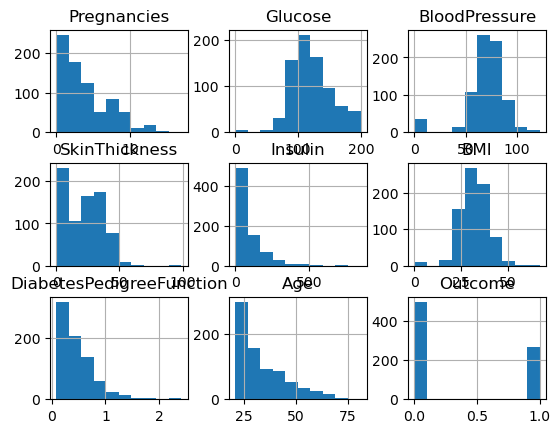

In [34]:
df.hist()

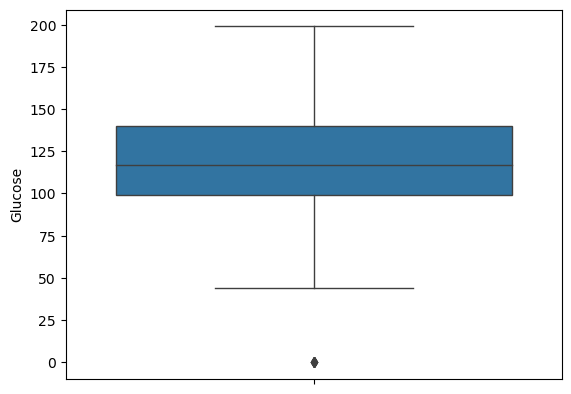

In [35]:
import matplotlib.pyplot as plt
import seaborn as sb
sb.boxplot(y=df['Glucose'],linewidth=1)
plt.figure(figsize=(500,20),dpi=100)
plt.grid()
plt.show()

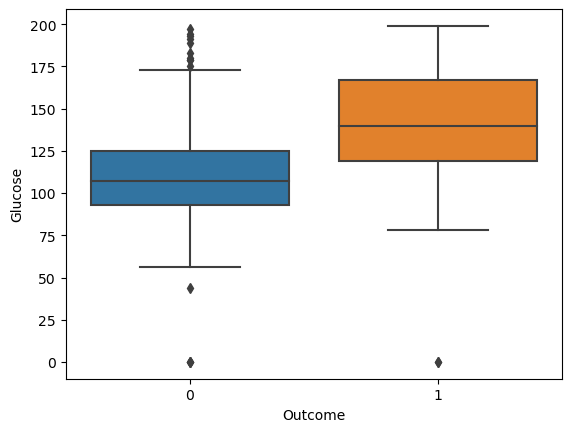

In [36]:
import seaborn as sbs
sbs.boxplot(x='Outcome',y='Glucose',data=df)
plt.show()

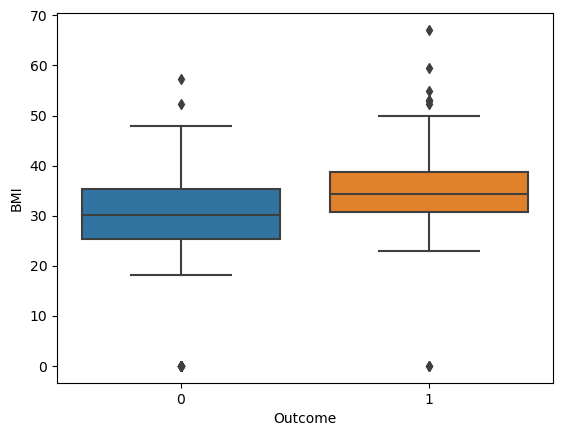

In [37]:
import seaborn as sbs
sbs.boxplot(x='Outcome',y='BMI',data=df)
plt.show()

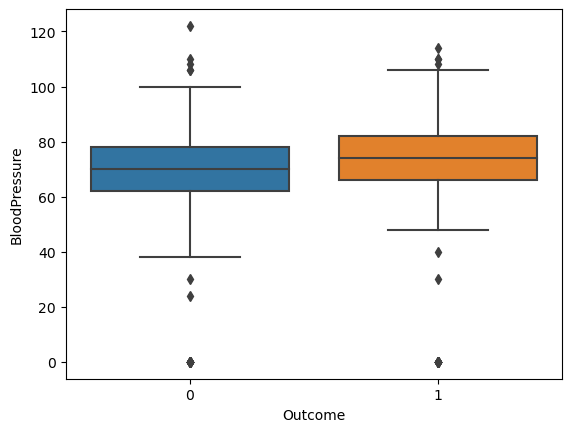

In [38]:
import seaborn as sbs
sbs.boxplot(x='Outcome',y='BloodPressure',data=df)
plt.show()

<Axes: >

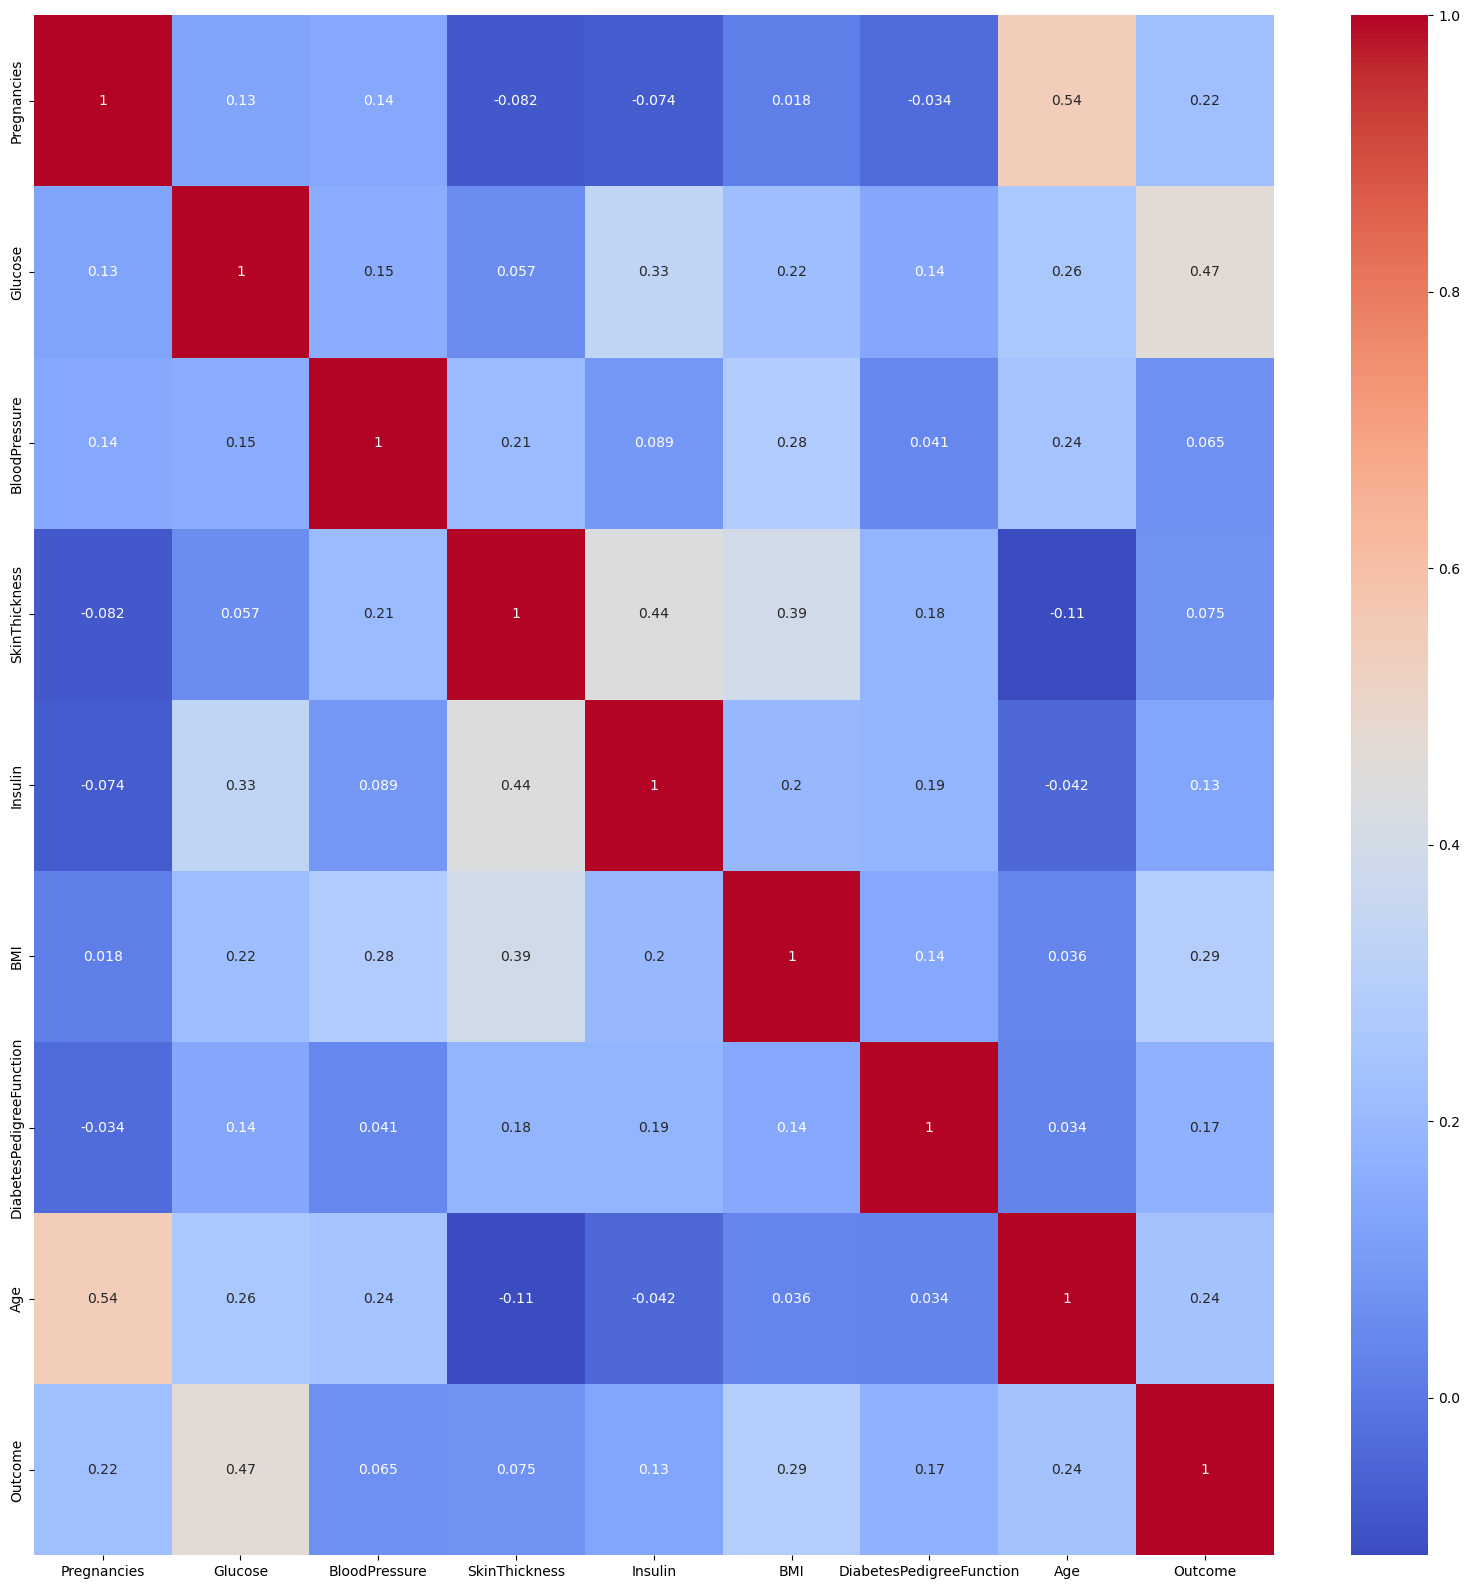

In [39]:
import seaborn as sbs
corr=df.corr()
fig,ax = plt.subplots(figsize=(20,20))
sbs.heatmap(corr, annot=True,ax=ax,cmap='coolwarm')

In [40]:
#Normalize Data
#Using: Feature(New)=Feature(Old)/Feature(Old)*Max
df['Pregnancies']=df['Pregnancies']/df['Pregnancies'].max()
df['SkinThickness']=df['SkinThickness']/df['SkinThickness'].max()
df['Age']=df['Age']/df['Age'].max()
df['BloodPressure']=df['BloodPressure']/df['BloodPressure'].max()
df['Glucose']=df['Glucose']/df['Glucose'].max()
df['Insulin']=df['Insulin']/df['Insulin'].max()
df['DiabetesPedigreeFunction']=df['DiabetesPedigreeFunction']/df['DiabetesPedigreeFunction'].max()
df['BMI']=df['BMI']/df['BMI'].max()
df['Outcome']=df['Outcome']/df['Outcome'].max()
myfile=df
print(myfile.columns)
myfile.tail()






Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,0.777778,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,0.333333,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,0.370370,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.144215,0.580247,1.0
767,0.058824,0.467337,0.573770,0.313131,0.000000,0.453055,0.130165,0.283951,0.0


In [41]:
#Spliting Dataset to Train and Test, 80% for Train and 20% for Test
from sklearn.model_selection import train_test_split
x=myfile.loc[:,myfile.columns !='Outcome']
y=myfile.loc[:,'Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x)
print(y)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

In [42]:
#Neural Network Implementation
from sklearn.neural_network import MLPClassifier
#Creating a Classifier from the Model:
mlp=MLPClassifier(hidden_layer_sizes=(8,5),max_iter=1000)
MLPClassifier()

#Fit the Training Data to my Model
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(8, 5), max_iter=1000)

In [43]:
#Checking Model Accuracy
from sklearn.metrics import accuracy_score
#Train accuracy
predictions_train=mlp.predict(x_train)
print("Accuracy for Train data :",accuracy_score(predictions_train,y_train))
print(y_test)
#Test accuracy
predictions_test=mlp.predict(x_test)
print("Accuracy for Test data :",accuracy_score(predictions_test,y_test))

Accuracy for Train data : 0.7687296416938111
527    0.0
98     0.0
645    0.0
681    1.0
697    0.0
      ... 
477    0.0
749    1.0
77     0.0
120    1.0
91     0.0
Name: Outcome, Length: 154, dtype: float64
Accuracy for Test data : 0.7857142857142857


In [44]:
Knn=KNeighborsClassifier(n_neighbors=3)
x=myfile.loc[:,myfile.columns !='Outcome']
y=myfile.loc[:,'Outcome']
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [45]:
y_predict=Knn.predict(x_test)
accuracy_score(y_test,y_predict)

0.7467532467532467

In [46]:
y_predict=Knn.predict(x_test)
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test,y_predict,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,85,15,100
1.0,24,30,54
All,109,45,154


In [47]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81       100
         1.0       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



In [48]:
d= np.array([[10,148,72,35,0,33.0,0.625,50]])
y_predict= mlp.predict(d)
y_predict


C:\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [94]:
MLPClassifier(hidden_layer_sizes=(8,5),max_iter=1000)


 

MLPClassifier(hidden_layer_sizes=(8, 5), max_iter=1000)

In [95]:
#Checking Model Accuracy
from sklearn.metrics import accuracy_score
#Train accuracy
predictions_train=mlp.predict(x_train)
print("Accuracy for Train data :",accuracy_score(predictions_train,y_train))
print(y_test)
#Test accuracy
predictions_test=mlp.predict(x_test)
print("Accuracy for Test data :",accuracy_score(predictions_test,y_test))

Accuracy for Train data : 0.7687296416938111
527    0.0
98     0.0
645    0.0
681    1.0
697    0.0
      ... 
477    0.0
749    1.0
77     0.0
120    1.0
91     0.0
Name: Outcome, Length: 154, dtype: float64
Accuracy for Test data : 0.7857142857142857


In [99]:
#testing with Glucose and BMI
df1=pd.DataFrame(data=myfile,index=None,columns=['BMI','Glucose','Outcome'],dtype=None,copy=True)
myfile2=df1
myfile2

,BMI,Glucose,Outcome
0,0.500745,0.743719,1.0
1,0.396423,0.427136,0.0
2,0.347243,0.919598,1.0
3,0.418778,0.447236,0.0
4,0.642325,0.688442,1.0
...,...,...,...
763,0.490313,0.507538,0.0
764,0.548435,0.613065,0.0
765,0.390462,0.608040,0.0
766,0.448584,0.633166,1.0


In [110]:
# KNN
Knn=KNeighborsClassifier(n_neighbors=5)
xa=myfile2.loc[:,myfile2.columns !='Outcome']
yb=myfile2.loc[:,'Outcome']
Knn.fit(a_train,b_train)
prediction = Knn.predict(a_test)
print(" {} nn score: {} ".format(5,Knn.score(a_test,b_test)))

y_predict = Knn.predict(a_test)
y_true=b_test
#Test accuracy
predictions_test=Knn.predict(a_test)
print("Accuracy for Test data :",accuracy_score(predictions_test,b_test))

 5 nn score: 0.7922077922077922 
Accuracy for Test data : 0.7922077922077922


In [108]:
from sklearn.metrics import confusion_matrix
y_predict=Knn.predict(a_test)
confusion_matrix=(b_test,y_predict)
pd.crosstab(b_test,y_predict,rownames=[True],colnames=['predicted'],margins=True)

predicted,0.0,1.0,All
True,,,
0.0,131,15,146
1.0,33,52,85
All,164,67,231


In [111]:
# Fit a decision tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print("Decision Tree Model Accuracy: {:.2f}%".format(accuracy))




Decision Tree Model Accuracy: 73.38%


In [118]:
from sklearn.metrics import confusion_matrix
y_predict=dt.predict(a_test)
confusion_matrix=(b_test,y_predict)
pd.crosstab(b_test,y_predict,rownames=[True],colnames=['predicted'],margins=True)

predicted,0.0,1.0,All
True,,,
0.0,139,7,146
1.0,8,77,85
All,147,84,231


In [112]:
# Fit a random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print("Random Forest Model Accuracy: {:.2f}%".format(accuracy))


Random Forest Model Accuracy: 80.52%


In [115]:
from sklearn.metrics import confusion_matrix
y_predict=rf.predict(a_test)
confusion_matrix=(b_test,y_predict)
pd.crosstab(b_test,y_predict,rownames=[True],colnames=['predicted'],margins=True)

predicted,0.0,1.0,All
True,,,
0.0,142,4,146
1.0,7,78,85
All,149,82,231


In [116]:
# Fit the logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg) * 100
print("Logistic Regression Model Accuracy: {:.2f}%".format(accuracy_logreg))


Logistic Regression Model Accuracy: 79.22%


In [117]:
from sklearn.metrics import confusion_matrix
y_predict=logreg.predict(a_test)
confusion_matrix=(b_test,y_predict)
pd.crosstab(b_test,y_predict,rownames=[True],colnames=['predicted'],margins=True)

predicted,0.0,1.0,All
True,,,
0.0,133,13,146
1.0,37,48,85
All,170,61,231


In [126]:
# Fit the logistic regression model
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred_svm = clf.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
print("SVM Model Accuracy: {:.2f}%".format(accuracy_svm))

SVM Model Accuracy: 78.57%


In [128]:
from sklearn.metrics import confusion_matrix
y_predict=clf.predict(a_test)
confusion_matrix=(b_test,y_predict)
pd.crosstab(b_test,y_predict,rownames=[True],colnames=['predicted'],margins=True)

predicted,0.0,1.0,All
True,,,
0.0,132,14,146
1.0,36,49,85
All,168,63,231
